In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

# Data Sources

In [2]:
gas_ratio  = 'Book3.xlsx'
aqi_level = 'Book1..xlsx'

# Pandas Dataframes

- AQI data is available for Chennai Location Only  hence ignoring other location for now

In [3]:
gas_ratio_df = pd.read_excel(gas_ratio, sheet_name='chennai')
aqi_level_df = pd.read_excel(aqi_level)

# Summary of Data

In [4]:
gas_ratio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 7 columns):
S.No                575 non-null int64
CITY                575 non-null object
Type                575 non-null object
STATION             575 non-null object
Date of Sampling    575 non-null object
AQI                 575 non-null int64
Remarks             575 non-null object
dtypes: int64(2), object(5)
memory usage: 31.6+ KB


# Description 

In [5]:
gas_ratio_df.describe()

,S.No,AQI
count,575.000000,575.000000
mean,289.293913,94.666087
std,166.845321,31.877703
min,1.000000,23.000000
25%,145.500000,71.000000
50%,289.000000,96.000000
75%,433.500000,113.000000
max,577.000000,292.000000


# First Look 

In [6]:
gas_ratio_df.head()

,S.No,CITY,Type,STATION,Date of Sampling,AQI,Remarks
0,1,CHENNAI,Residential,Anna Nagar - 765,05.06.18,68,Satisfactory
1,2,CHENNAI,Residential,Anna Nagar - 765,07.06.18,63,Satisfactory
2,3,CHENNAI,Residential,Anna Nagar - 765,12.06.18,70,Satisfactory
3,4,CHENNAI,Residential,Anna Nagar - 765,14.06.18,63,Satisfactory
4,5,CHENNAI,Residential,Anna Nagar - 765,19.06.18,63,Satisfactory


In [7]:
aqi_level_df.head()

,stations,Date & Period of Survey,PM10,PM2.5,SO2,NO2
0,Anna Nagar,2019-02-01 00:00:00,106,40.0,11,18
1,Anna Nagar,2019-05-07 00:00:00,119,31.0,14,26
2,Nungambakkam,2019-04-07 00:00:00,126,35.0,13,29
3,Anna Nagar,2019-07-01 00:00:00,94,31.0,13,20
4,Nungambakkam,2019-08-01 00:00:00,72,39.0,14,22


# Converting AQI Column into int

In [8]:
gas_ratio_df = gas_ratio_df.astype({"AQI": int}) 

In [9]:
gas_ratio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 7 columns):
S.No                575 non-null int64
CITY                575 non-null object
Type                575 non-null object
STATION             575 non-null object
Date of Sampling    575 non-null object
AQI                 575 non-null int64
Remarks             575 non-null object
dtypes: int64(2), object(5)
memory usage: 31.6+ KB


In [10]:
gas_ratio_df.describe()

,S.No,AQI
count,575.000000,575.000000
mean,289.293913,94.666087
std,166.845321,31.877703
min,1.000000,23.000000
25%,145.500000,71.000000
50%,289.000000,96.000000
75%,433.500000,113.000000
max,577.000000,292.000000


# Dropping 'S.No' Column as it holds no significance in data

In [11]:
gas_ratio_df.drop('S.No', axis=1, inplace=True)

In [12]:
gas_ratio_df.head()

,CITY,Type,STATION,Date of Sampling,AQI,Remarks
0,CHENNAI,Residential,Anna Nagar - 765,05.06.18,68,Satisfactory
1,CHENNAI,Residential,Anna Nagar - 765,07.06.18,63,Satisfactory
2,CHENNAI,Residential,Anna Nagar - 765,12.06.18,70,Satisfactory
3,CHENNAI,Residential,Anna Nagar - 765,14.06.18,63,Satisfactory
4,CHENNAI,Residential,Anna Nagar - 765,19.06.18,63,Satisfactory


#### Columns Type , Station, Remarks are Text Data, Lets find their distributions

In [13]:
gas_ratio_df.groupby('Type').count().reset_index()

,Type,CITY,STATION,Date of Sampling,AQI,Remarks
0,Mixed,234,234,234,234,234
1,Residential,222,222,222,222,222
2,Traffic inter - section,119,119,119,119,119


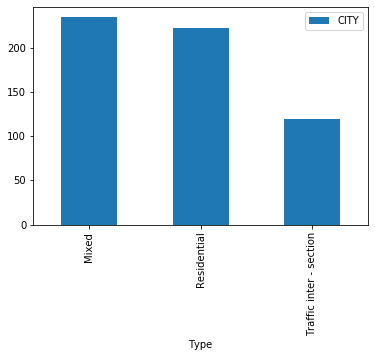

In [14]:
gas_ratio_df.groupby('Type').count().reset_index().plot('Type', 'CITY', kind='bar')

In [15]:
gas_ratio_df.groupby('STATION').count().reset_index()

,STATION,CITY,Type,Date of Sampling,AQI,Remarks
0,Adyar - 764,115,115,115,115,115
1,Anna Nagar - 765,107,107,107,107,107
2,Kilpauk - 767,116,116,116,116,116
3,Nungambakkam - 895,119,119,119,119,119
4,T.Nagar 766,118,118,118,118,118


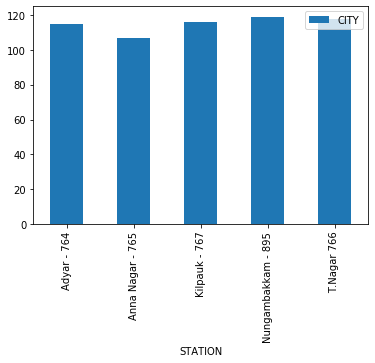

In [16]:
gas_ratio_df.groupby('STATION').count().reset_index().plot('STATION', 'CITY', kind='bar')

In [17]:
gas_ratio_df.groupby('Remarks').count().reset_index()

,Remarks,CITY,Type,STATION,Date of Sampling,AQI
0,Good,28,28,28,28,28
1,Moderate,238,238,238,238,238
2,Poor,4,4,4,4,4
3,Satisfactory,302,302,302,302,302
4,good,2,2,2,2,2
5,moderate,1,1,1,1,1


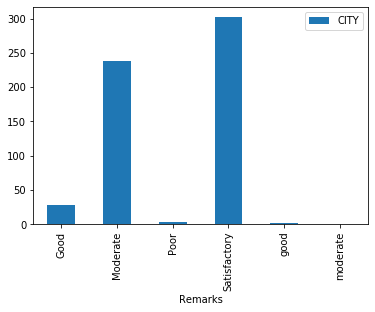

In [18]:
gas_ratio_df.groupby('Remarks').count().reset_index().plot('Remarks', 'CITY', kind='bar')

# Time Series Analysis of AQI 
### Resetting Date of Sampling as Index 

In [19]:
gas_ratio_df.set_index('Date of Sampling')

,CITY,Type,STATION,AQI,Remarks
Date of Sampling,,,,,
05.06.18,CHENNAI,Residential,Anna Nagar - 765,68,Satisfactory
07.06.18,CHENNAI,Residential,Anna Nagar - 765,63,Satisfactory
12.06.18,CHENNAI,Residential,Anna Nagar - 765,70,Satisfactory
14.06.18,CHENNAI,Residential,Anna Nagar - 765,63,Satisfactory
19.06.18,CHENNAI,Residential,Anna Nagar - 765,63,Satisfactory
...,...,...,...,...,...
14.08.19,CHENNAI,Traffic inter - section,Nungambakkam - 895,58,Satisfactory
19.08.19,CHENNAI,Traffic inter - section,Nungambakkam - 895,72,Satisfactory
22.08.19,CHENNAI,Traffic inter - section,Nungambakkam - 895,52,Satisfactory


In [20]:
gas_ratio_df['Date of Sampling']  = pd.to_datetime(gas_ratio_df['Date of Sampling'], format='%d.%m.%y', errors='ignore') 

In [21]:
gas_ratio_df.set_index('Date of Sampling').sort_index()

,CITY,Type,STATION,AQI,Remarks
Date of Sampling,,,,,
01.02.19,CHENNAI,Mixed,T.Nagar 766,73,Satisfactory
01.02.19,CHENNAI,Traffic inter - section,Nungambakkam - 895,155,Moderate
01.04.19,CHENNAI,Residential,Anna Nagar - 765,139,Moderate
01.04.19,CHENNAI,Mixed,T.Nagar 766,101,Moderate
01.06.18,CHENNAI,Traffic inter - section,Nungambakkam - 895,109,Satisfactory
...,...,...,...,...,...
31.08.18,CHENNAI,Residential,Adyar - 764,58,Satisfactory
31.10.18,CHENNAI,Traffic inter - section,Nungambakkam - 895,64,Satisfactory
31.10.18,CHENNAI,Mixed,T.Nagar 766,96,Satisfactory


In [22]:
gas_ratio_df = gas_ratio_df.set_index('Date of Sampling').sort_index()

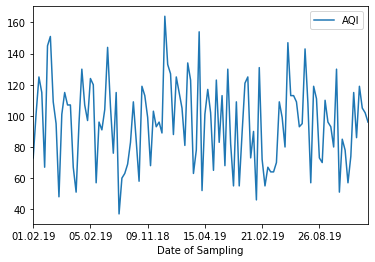

In [23]:
gas_ratio_df[gas_ratio_df['STATION'] == 'T.Nagar 766'].plot(y='AQI')

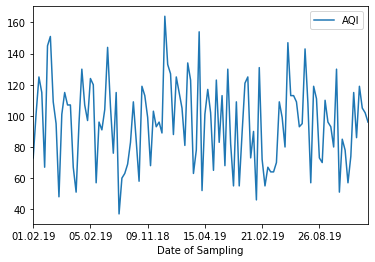

In [24]:
gas_ratio_df[gas_ratio_df['STATION'] == 'T.Nagar 766'].plot(y='AQI')

In [25]:
from datetime import datetime as dt
for value in gas_ratio_df.index:
    try :
        dt.strptime(value, '%d.%m.%y')
    except:
        print(value)

31.06.18


In [27]:
gas_ratio_df.drop(index='31.06.18', inplace=True)

In [32]:
gas_ratio_df.index = pd.to_datetime(gas_ratio_df.index)

In [33]:
gas_ratio_df.index

DatetimeIndex(['2019-01-02', '2019-01-02', '2019-01-04', '2019-01-04',
               '2018-01-06', '2018-01-06', '2019-01-07', '2019-01-07',
               '2018-01-08', '2018-01-08',
               ...
               '2019-05-31', '2018-07-31', '2018-07-31', '2019-07-31',
               '2019-07-31', '2018-08-31', '2018-10-31', '2018-10-31',
               '2018-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='Date of Sampling', length=574, freq=None)

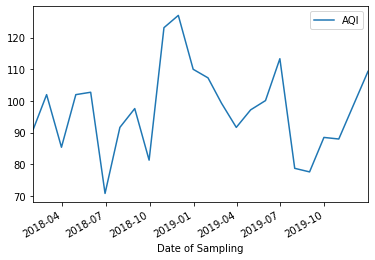

In [42]:
gas_ratio_df[gas_ratio_df['STATION'] == 'T.Nagar 766'].resample('M').mean().dropna().plot(y='AQI')